Enter song name: Don't start now
Enter artist name: Dua Lipa

🎧 Recommended Songs:
                                                                                               Song                        Artist  similarity
                                                                                    Don't Start Now                  ['Dua Lipa']    0.999847
                                                                                           Believer           ['Imagine Dragons']    0.994600
                                                                                          New Rules                  ['Dua Lipa']    0.984614
Waka Waka (This Time for Africa) [The Official 2010 FIFA World Cup (TM) Song] (feat. Freshlyground)  ['Shakira', 'Freshlyground']    0.983978
                                                                           One Kiss (with Dua Lipa) ['Calvin Harris', 'Dua Lipa']    0.982699
                                                                 

/tmp/ipython-input-354419210.py:58: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


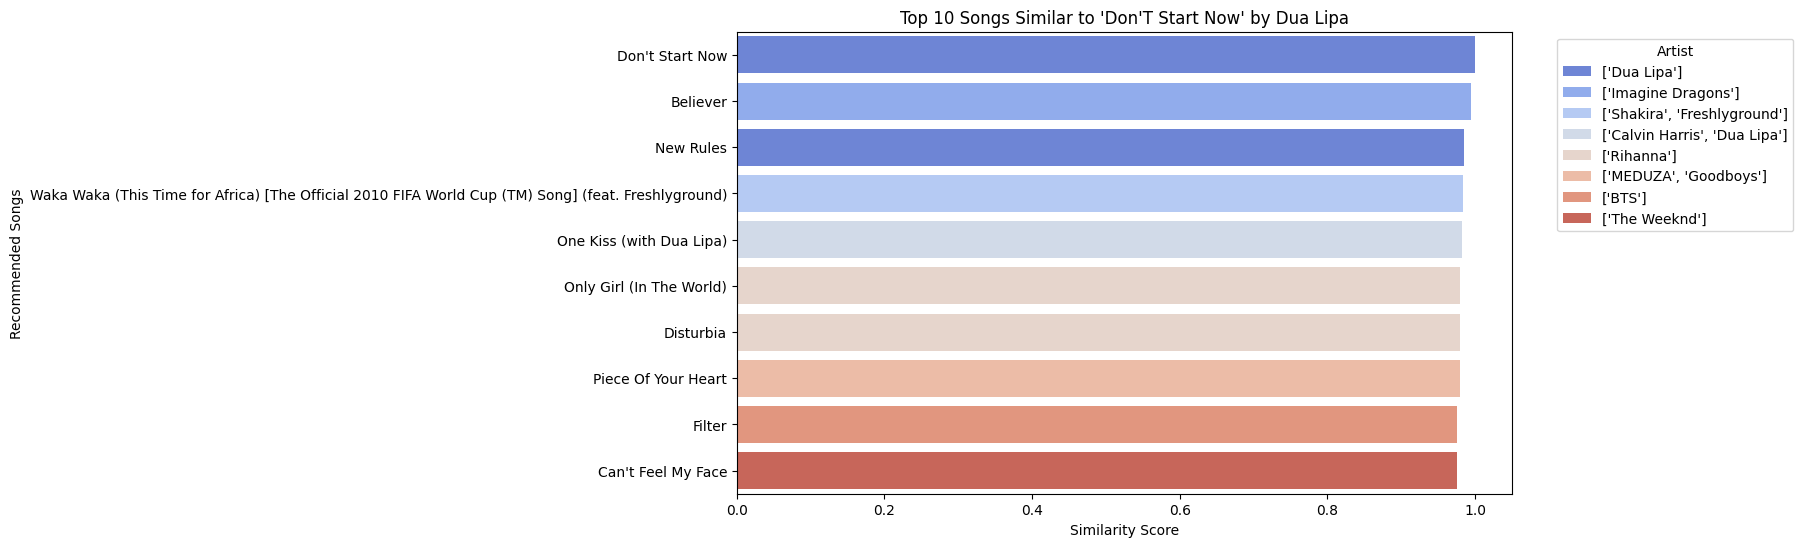

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df =pd.read_csv("/content/drive/MyDrive/spotify_dataset/data.csv")

# Drop non-numeric or unnecessary columns
df = df.drop(columns=['year'])  # Remove year column if present

# Save original info for display
original_info = df[['name', 'artists']].copy()

#Scale numeric features
features = df.select_dtypes(include='number')
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Get user input
song_input = input("Enter song name: ").strip().lower()
artist_input = input("Enter artist name: ").strip().lower()

# Find the song row
match = df[(df['name'].str.lower() == song_input) &
           (df['artists'].str.lower().str.contains(artist_input))]

if match.empty:
    print("Song not found in dataset.")
else:
    song_idx = match.index[0]
    song_vector = scaled_features[song_idx].reshape(1, -1)

    # Compute cosine similarity
    similarity_scores = cosine_similarity(song_vector, scaled_features)[0]

    # Sort and get top 10 (excluding the input song)
    df['similarity'] = similarity_scores
    recommendations = df.drop(index=song_idx).sort_values(by='similarity', ascending=False).head(10)

    # Merge with original info
    recommendations = recommendations.merge(original_info, left_index=True, right_index=True)
    display_cols = ['name_y', 'artists_y', 'similarity']
    recommendations = recommendations[display_cols].rename(columns={'name_y': 'Song', 'artists_y': 'Artist'})

    # Show text output
    print("\n🎧 Recommended Songs:")
    print(recommendations.to_string(index=False))

    # Plot
    plt.figure(figsize=(10, 6))
    sns.barplot(y='Song', x='similarity', data=recommendations, hue='Artist', dodge=False, palette='coolwarm')
    plt.title(f"Top 10 Songs Similar to '{song_input.title()}' by {artist_input.title()}")
    plt.xlabel('Similarity Score')
    plt.ylabel('Recommended Songs')
    plt.legend(title='Artist', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()
